<a href="https://colab.research.google.com/github/Mifekmk/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/ch01_07_CNN%EA%B8%B0%EC%B4%88_Pooling_Layer_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch01.07 CNN기초 - Pooling Layer
---

* 날짜: 2022-07-05
* 이름: 김민규

## 학습내용
    - CNN의 개념을 이해한다.
    - 텐서플로우를 이용해 CNN을 구성한다.
    - CNN 모델을 이용해 손글씨 이미지를 분류한다.
    - CNN의 feature map에 대해 이해한다.

## 데이터셋

* MNIST

```
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
```

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Pooling layer
---

풀링(Pooling) 연산은 커널과 스트라이드 개념이 존재한다는 점에서 합성곱 연산과 유사하지만, 학습해야 할 가중치가 없으며 연산 후에 채널 수가 변하지 않습니다. 일반적으로 합성곱 층(합성곱 연산 + 활성화 함수) 다음에는 풀링 층을 추가하는 것이 일반적입니다. 


In [2]:
from tensorflow.keras.layers import MaxPool2D, AvgPool2D

### **| 맥스 풀링(Max Pooling)**
맥스풀링은 이미지 영역의 최대값 만을 출력값으로 가지는 연산 방법입니다. 



<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0107-01.PNG?raw=true width=400>
</p>



In [4]:
x = np.array([1,0,1,1,1,2,0,0,1,0,1,0,0,0,1,1], dtype='float16').reshape(1,4,4,1)
print(x[0,:,:,0], x.shape) # kernel_size = pool_size input shape = (n.w, h, ch)
y = MaxPool2D(pool_size=2, strides=1)(x)
print(y[0,:,:,0], y.shape)

[[1. 0. 1. 1.]
 [1. 2. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 1. 1.]] (1, 4, 4, 1)
tf.Tensor(
[[2. 2. 1.]
 [2. 2. 1.]
 [1. 1. 1.]], shape=(3, 3), dtype=float32) (1, 3, 3, 1)


### **| 평균 풀링(Average Pooling)**


평균풀링은 이미지 영역의 평균값 을 출력값으로 가지는 연산 방법입니다. 


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0107-02.PNG?raw=true width=400>
</p>





In [6]:
x = np.array([1,0,1,1,1,2,0,0,1,0,1,0,0,0,1,1], dtype='float16').reshape(1,4,4,1)
print(x[0,:,:,0], x.shape)
y = AvgPool2D(pool_size=2, strides=1)(x)
print(y[0,:,:,0], y.shape)

[[1. 0. 1. 1.]
 [1. 2. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 1. 1.]] (1, 4, 4, 1)
tf.Tensor(
[[1.   0.75 0.5 ]
 [1.   0.75 0.25]
 [0.25 0.5  0.75]], shape=(3, 3), dtype=float32) (1, 3, 3, 1)


## LeNet-5
---

LeNet-5[(논문)](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) 구조는 아마도 가장 널리 알려진 CNN 구조일 것입니다. 이 구조는 1998년 얀 르쿤이 만들었으며 손글씨 숫자 인식(MNIST)에 널리 사용되었습니다. 


![](https://www.datasciencecentral.com/wp-content/uploads/2021/10/1lvvWF48t7cyRWqct13eU0w.jpeg)

### | LeNet-5을 이용한 손글씨 이미지 분류

####  **데이터 준비**

In [7]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 전처리-정규화
x_train, x_test = x_train/255.0, x_test/255.
# 전처리-shape 맞추기
x_train = np.expand_dims(x_train,3)
x_test = np.expand_dims(x_test,3)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


#### **모델 구성**

In [9]:
from tensorflow.keras import layers, models, utils
def build_lenet5():
    x = layers.Input(shape=(28,28,1))
    y = layers.Conv2D(filters=6, kernel_size=5, padding='same', activation='tanh')(x)
    y = layers.AvgPool2D(pool_size=2, strides=2)(y)
    y = layers.Conv2D(filters=16, kernel_size=5, padding='valid', activation='tanh')(y)
    y = layers.MaxPool2D(pool_size=2, strides=2)(y)

    y = layers.Flatten()(y)
    y = layers.Dense(120, activation='tanh')(y)
    y = layers.Dense(84, activation='tanh')(y)
    y = layers.Dense(10, activation='softmax')(y)
    model = tf.keras.models.Model(x,y)
    return model

model = build_lenet5()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_1 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0     

#### **학습 및 평가**

In [10]:
model = build_lenet5()
model.summary()
model.compile(optimizer='sgd', # 경사하강법 (배치개수에 한번씩 업데이트)
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train, epochs=10)
print('------------- 테스트 스코어 -----------------')
model.evaluate(x_test, y_test)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 400)               0   

[0.05045868828892708, 0.9825000166893005]

### **| Feature map**

#### **feature map 얻기**

#### **시각화**

![](https://www.datasciencecentral.com/wp-content/uploads/2021/10/1lvvWF48t7cyRWqct13eU0w.jpeg)

[시각화 함수 스크립트](https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/scripts/featuremap_dict.py)

In [11]:

import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

def show_featuremap(sample_idx, fmaps, cnn_idxs, flatten_idxs):
  for idx in cnn_idxs:
    fmap = fmaps[idx][sample_idx]
    chs = fmap.shape[2]
    print(f'{idx} 번째 Convolutional 레이어 {fmap.shape}')
    for ch in range(chs):
      plt.subplot(1,chs,ch+1)
      plt.imshow(fmap[:,:,ch], cmap='gray')
      plt.xticks([]);plt.yticks([])
    plt.show()

  for idx in flatten_idxs:
    fmap = fmaps[idx][sample_idx]
    print(f'{idx} 번째 Dense 레이어 {fmap.shape}')
    plt.figure(figsize=(int(len(fmap)/5),10))
    plt.imshow(tf.reshape(fmap,(1,len(fmap))), cmap='gray')
    plt.xticks(range(10));plt.yticks([]);plt.show()

## 과제 1. 의류 이미지 분류
---
* 데이터셋 : f-minst(fashoin mnist)
* 데이터를 소개하세요.
* 데이터의 형태를 파악하세요
* 적절한 모델을 생성하세요
* 데이터에 적합하게 학습을 진행하세요.

In [13]:
import tensorflow as tf

# 1. Fashion MNIST 데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [15]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [16]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [17]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [18]:
# 2. 데이터 전처리
train_images, test_images = train_images / 255.0, test_images / 255.0

In [30]:
# 3. 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='tanh'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [31]:
# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
# 5. 모델 훈련
model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 20s 10ms/step - loss: 0.4799 - accuracy: 0.8256
Epoch 2/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3707 - accuracy: 0.8640
Epoch 3/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3377 - accuracy: 0.8765
Epoch 4/15
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3183 - accuracy: 0.8822
Epoch 5/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3000 - accuracy: 0.8902
Epoch 6/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2888 - accuracy: 0.8934
Epoch 7/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2738 - accuracy: 0.8988
Epoch 8/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2697 - accuracy: 0.9005
Epoch 9/15
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2590 - accuracy: 0.9035
Epoch 10/15
1875/1875 [==============================] - 19s 10ms/ste

In [24]:
# 6. 정확도 평가하기
loss, accuracy = model.evaluate(test_images, test_labels)
print(loss, accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.3941 - accuracy: 0.8916
0.3941105902194977 0.8916000127792358


In [25]:
# 7. 예측하기
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))

[1.5095196e-12 2.8791815e-14 7.6481252e-16 3.6358553e-20 3.9419838e-15
 6.5939598e-06 8.0985218e-15 1.5799227e-03 2.9248681e-14 9.9841344e-01]
9


In [26]:
# 3. 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),      ## CASE 1
    # tf.keras.layers.Dense(512, activation='relu'),    ## CASE 2
    # tf.keras.layers.Dense(1024, activation='relu'),   ## CASE 3
    tf.keras.layers.Dense(10, activation='softmax')
])

In [27]:
# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
# 5. 모델 훈련
model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4984 - accuracy: 0.8250
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3738 - accuracy: 0.8657
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3374 - accuracy: 0.8775
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3119 - accuracy: 0.8856
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2959 - accuracy: 0.8909
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2804 - accuracy: 0.8962
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2672 - accuracy: 0.9009
Epoch 8/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2556 - accuracy: 0.9049
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2485 - accuracy: 0.9070
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.238

## 과제 2. 동물 및 물체 이미지 분류
---
* 데이터셋 : cifar-10
* 데이터의 형태를 파악하세요
* 적절한 모델을 생성하세요
* 데이터를 학습하세요.

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 6)         456       
                                                                 
 average_pooling2d_3 (Averag  (None, 16, 16, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 16)        2416      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                    

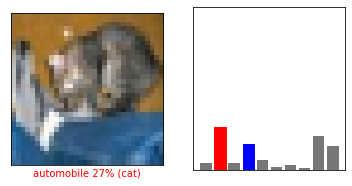

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
 
# 라이브러리 사용
import tensorflow as tf
import pandas as pd

cifar10 = datasets.cifar10 
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
 
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
 
print("Train samples:", train_images.shape, train_labels.shape)
print("Test samples:", test_images.shape, test_labels.shape)
 
train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))



# 모델 구성
def build_lenet():
    x = layers.Input(shape=(32,32,3))
    y = layers.Conv2D(6, kernel_size=5, padding='same',activation='tanh')(x)
    y = layers.AvgPool2D(pool_size=2, strides=2)(y)
    y = layers.Conv2D(filters=16, kernel_size=5, padding='valid', activation='tanh')(y)
    y = layers.MaxPool2D(pool_size=2, strides=2)(y)

    y = layers.Flatten()(y)
    y = layers.Dense(120, activation='tanh')(y)
    y = layers.Dense(84, activation='tanh')(y)
    y = layers.Dense(10, activation='softmax')(y)
    model = tf.keras.models.Model(x, y)
    return model

model = build_lenet()
model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)
 
test_loss, test_acc = model.evaluate(test_images, test_labels)
 
print('Test accuracy:', test_acc)
 
predictions = model.predict(test_images)
 
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
 
  plt.imshow(img, cmap=plt.cm.binary)
 
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
 
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label[0]]),
                                color=color)
 
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label[0]].set_color('blue')
 
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()